In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,
    explained_variance_score, r2_score, accuracy_score, confusion_matrix
)


In [2]:
def load_images(folder_path, label, image_size=64):
    images = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            image_path = os.path.join(folder_path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                image_resized = cv2.resize(image, (image_size, image_size))
                images.append(image_resized.flatten())  # Flatten the image
                labels.append(label)
    return np.array(images), np.array(labels)

# Load healthy and unhealthy images
healthy_images, healthy_labels = load_images('D:/AI Algorithm/cucumber/healthy/', 0)
unhealthy_images, unhealthy_labels = load_images('D:/AI Algorithm/cucumber/unhealthy/', 1)

# Combine images and labels
X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize and train the Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),  # Use 'estimator' instead of 'base_estimator'
    n_estimators=10,
    random_state=42
)
bagging_model.fit(X_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Predict the target for the test set
y_pred = bagging_model.predict(X_test)

# Convert predictions to binary (0 or 1) for classification metrics
y_pred_class = np.round(y_pred)

# Calculate accuracy, precision, recall, F1-score, and AUC
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred_class)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Multiply by 100 to get percentage

epsilon = 1e-10  # Small constant to prevent division by zero
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test) + epsilon))

#smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

# Other evaluation metrics
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mbd = np.mean(y_pred - y_test)  # Mean Bias Deviation (MBD)

# Print all the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Systematic Mean Absolute Percentage Error (SMAPE): {smape:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Bias Deviation (MBD): {mbd:.2f}")


Accuracy: 0.81
Precision: 0.81
Recall: 0.94
F1-Score: 0.87
AUC: 0.72
Confusion Matrix:
[[ 35  35]
 [ 10 151]]
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
Mean Absolute Percentage Error (MAPE): 63947215488204464.00
Systematic Mean Absolute Percentage Error (SMAPE): 71.88
Explained Variance Score: 0.39
R^2 Score: 0.39
Mean Bias Deviation (MBD): 0.02


In [6]:
import joblib

# Save the model
joblib.dump(bagging_model, 'bagging_leaf_health_model.pkl')
print("Bagging Regressor model saved as 'bagging_leaf_health_model.pkl'")


Bagging Regressor model saved as 'bagging_leaf_health_model.pkl'


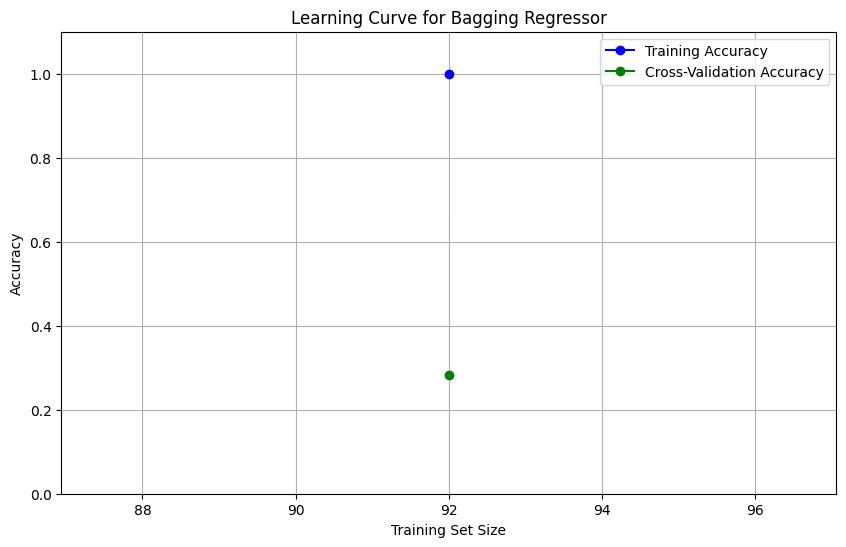

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

def plot_learning_curve(estimator, X, y, title="Learning Curve (Bagging Regressor - Accuracy)", cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots a learning curve for the given estimator and dataset using accuracy as the metric.

    Parameters:
    - estimator: The machine learning model (e.g., Bagging Regressor).
    - X: Feature set.
    - y: Target labels.
    - title: Title of the plot.
    - cv: Number of cross-validation folds.
    - n_jobs: Number of parallel jobs for computation.
    - train_sizes: Array of training set sizes to use for generating the learning curve.
    """
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation Accuracy")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
    
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.1)  # Y-axis scaled from 0 to 1
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Initialize the Bagging Regressor model
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Plot the learning curve for Bagging Regressor with accuracy as the metric
plot_learning_curve(bagging_regressor, X, y, title="Learning Curve for Bagging Regressor")


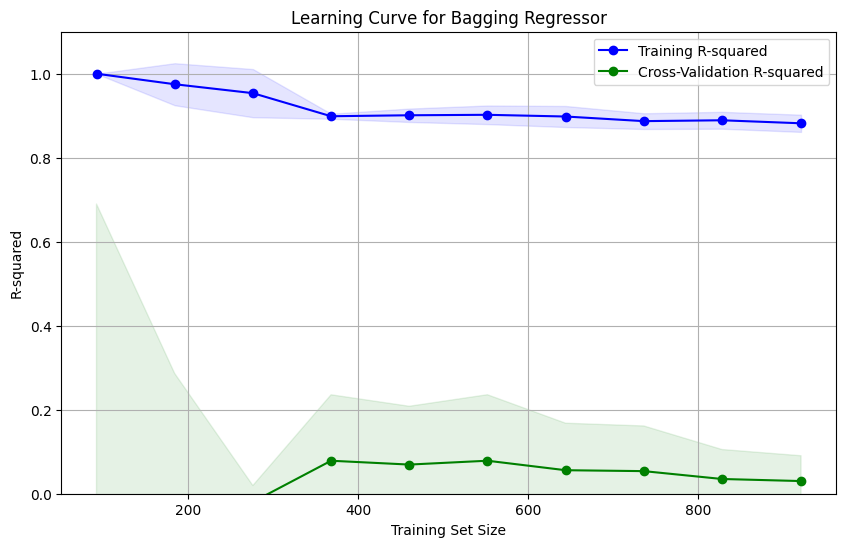

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

def plot_learning_curve(estimator, X, y, title="Learning Curve (Bagging Regressor - R-squared)", cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots a learning curve for the given estimator and dataset using R-squared as the metric.

    Parameters:
    - estimator: The machine learning model (e.g., Bagging Regressor).
    - X: Feature set.
    - y: Target labels.
    - title: Title of the plot.
    - cv: Number of cross-validation folds.
    - n_jobs: Number of parallel jobs for computation.
    - train_sizes: Array of training set sizes to use for generating the learning curve.
    """
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(r2_score)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training R-squared")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation R-squared")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
    
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("R-squared")
    plt.ylim(0, 1.1)  # Y-axis scaled from 0 to 1
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Initialize the Bagging Regressor model
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Plot the learning curve for Bagging Regressor with R-squared as the metric
plot_learning_curve(bagging_regressor, X, y, title="Learning Curve for Bagging Regressor")


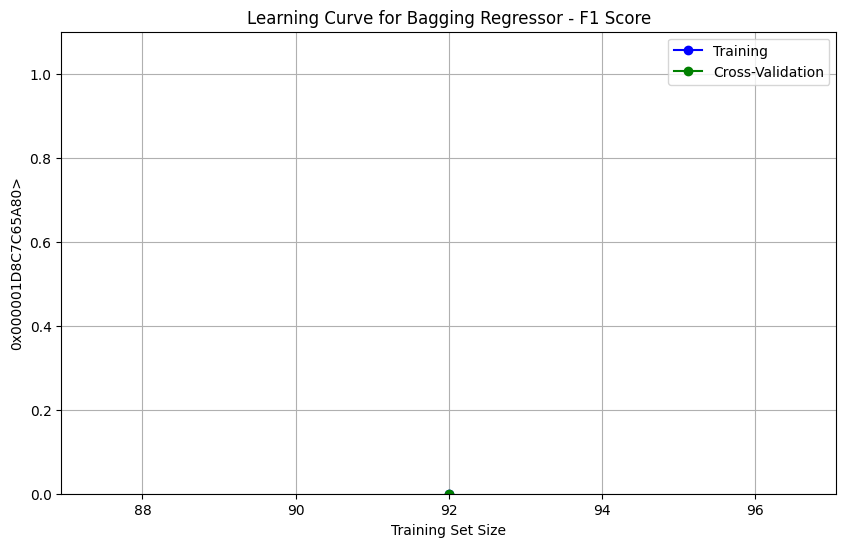

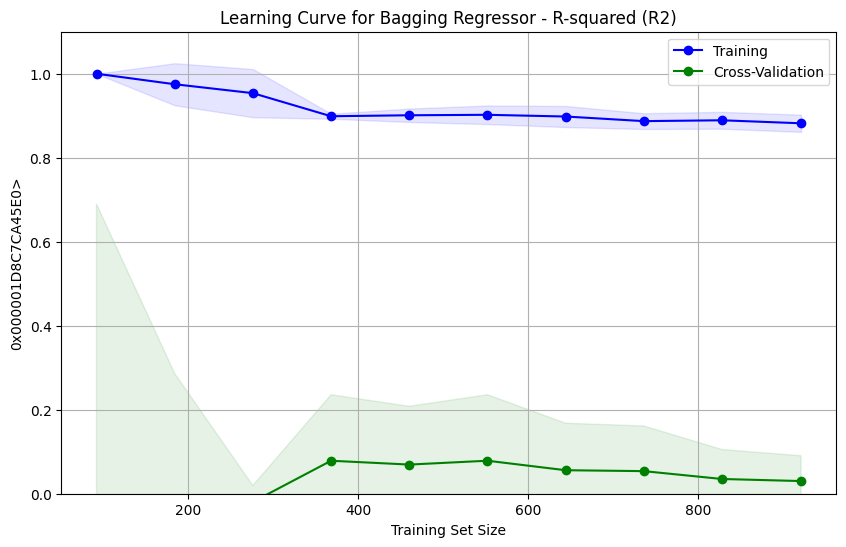

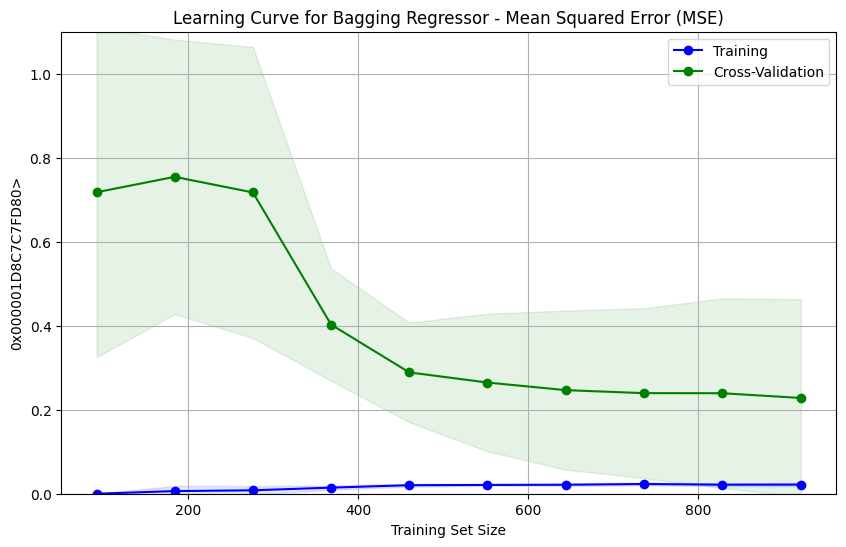

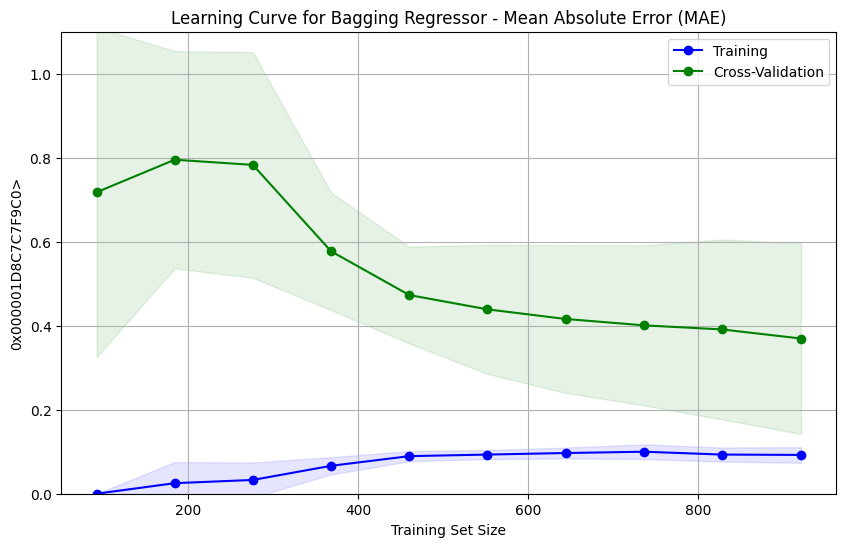

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

def plot_learning_curve(estimator, X, y, title, metric, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots a learning curve for the given estimator and dataset using the specified metric.
    
    Parameters:
    - estimator: The machine learning model (e.g., Bagging Regressor).
    - X: Feature set.
    - y: Target labels.
    - title: Title of the plot.
    - metric: The evaluation metric (e.g., f1_score, r2_score).
    - cv: Number of cross-validation folds.
    - n_jobs: Number of parallel jobs for computation.
    - train_sizes: Array of training set sizes to use for generating the learning curve.
    """
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(metric)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
    
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(str(metric).split()[-1])
    plt.ylim(0, 1.1)  # Y-axis scaled from 0 to 1
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Initialize the Bagging Regressor model
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Metrics for evaluation
metrics = {
    "F1 Score": f1_score,
    "R-squared (R2)": r2_score,
    "Mean Squared Error (MSE)": mean_squared_error,
    "Mean Absolute Error (MAE)": mean_absolute_error
}

# Plot learning curves for each metric
for metric_name, metric_function in metrics.items():
    plot_learning_curve(
        bagging_regressor, X, y, 
        title=f"Learning Curve for Bagging Regressor - {metric_name}", 
        metric=metric_function
    )


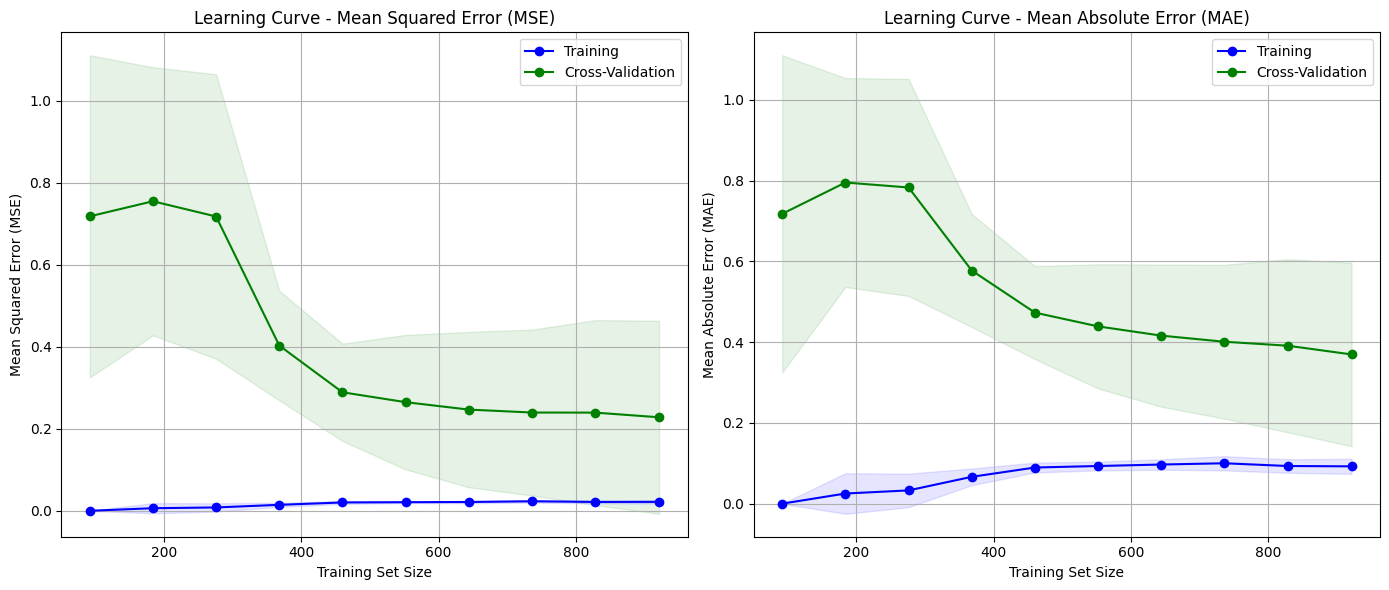

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

def plot_learning_curve(estimator, X, y, metric, metric_name, ax, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots a learning curve for the given estimator and dataset using the specified metric.

    Parameters:
    - estimator: The machine learning model (e.g., Bagging Regressor).
    - X: Feature set.
    - y: Target labels.
    - metric: The evaluation metric function.
    - metric_name: The name of the metric (used for labeling).
    - ax: The axis to plot the curve on.
    - cv: Number of cross-validation folds.
    - n_jobs: Number of parallel jobs for computation.
    - train_sizes: Array of training set sizes to use for generating the learning curve.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(metric)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color="blue", label="Training")
    ax.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation")

    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

    ax.set_title(f"Learning Curve - {metric_name}")
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel(metric_name)
    ax.legend(loc="best")
    ax.grid()

# Initialize the Bagging Regressor model
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Create subplots for MSE and MAE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot learning curves for MSE and MAE
plot_learning_curve(bagging_regressor, X, y, mean_squared_error, "Mean Squared Error (MSE)", axes[0])
plot_learning_curve(bagging_regressor, X, y, mean_absolute_error, "Mean Absolute Error (MAE)", axes[1])

plt.tight_layout()
plt.show()
